# 目录

* 创建数组
    * [使用 array 创建](?#使用array创建)
    * [使用函数创建](?#使用函数创建)
* [存取](?#存取)
    * [常规方法](?#常规办法：数组元素的存取方法和Python的标准方法相同)
    * [整数/布尔数组存取](?#整数/布尔数组存取)
    * [二维数组的切片](?#二维数组的切片)
* [numpy与Python数学库的时间比较](?#numpy与Python数学库的时间比较)
* [绘图](?#绘图)
    * 绘制正态分布概率密度函数
    * 损失函数：Logistic损失(-1,1)/SVM Hinge损失/ 0/1损失
    * x^x
    * 胸型线
    * 心形线
    * 渐开线
* [概率分布](?#概率分布)
    * 均匀分布、验证中心极限定理、Poisson分布、直方图的使用
* [插值](?#插值)
* [绘制三维图像](?#绘制三维图像)
* [scipy](?#scipy)
    * [线性回归](?#线性回归)
    * [使用scipy计算函数极值](?#使用scipy计算函数极值) BFGS 算法
* [作业](?#作业)
    * [画图](?#画图)
    * [svd](?#SVD恢复图片)

# 初始化

In [8]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

# 导入NumPy函数库，一般都是用这样的形式(包括别名np，几乎是约定俗成的)
%matplotlib inline
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
from scipy.optimize import leastsq
import scipy.optimize as opt
import scipy
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import CubicSpline
import math

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def residual(t, x, y):
    return y - (t[0] * x ** 2 + t[1] * x + t[2])


def residual2(t, x, y):
    print t[0], t[1]
    return y - t[0]*np.sin(t[1]*x)


# x ** x        x > 0
# (-x) ** (-x)  x <0
def f(x):
    y = np.ones_like(x)
    i = x > 0
    y[i] = np.power(x[i], x[i])
    i = x < 0
    y[i] = np.power(-x[i], -x[i])
    return y

## 开场白：


In [3]:
# numpy是非常好用的数据包，如：可以这样得到这个二维数组

# [[ 0  1  2  3  4  5]
#  [10 11 12 13 14 15]
#  [20 21 22 23 24 25]
#  [30 31 32 33 34 35]
#  [40 41 42 43 44 45]
#  [50 51 52 53 54 55]]
a = np.arange(0,60,10).reshape((-1, 1)) + np.arange(6)
print a

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]



正式开始  -:)

标准Python的列表(list)中，元素本质是对象。

如：L = [1, 2, 3]，需要3个指针和三个整数对象，对于数值运算比较浪费内存和CPU。

因此，Numpy提供了ndarray(N-dimensional array object)对象：存储单一数据类型的多维数组。

## 使用array创建

通过array函数传递list对象

In [4]:
L = [1, 2, 3, 4, 5, 6]
print L
a = np.array(L)
print a

[1, 2, 3, 4, 5, 6]
[1 2 3 4 5 6]


In [5]:
# # 若传递的是多层嵌套的list，将创建多维数组
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print b

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [6]:
# #
# # # 数组大小可以通过其shape属性获得
print a.shape
print b.shape

(6,)
(3, 4)


In [7]:
# #
# # 也可以强制修改shape
b.shape = 4, 3
print b

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [8]:
# # # 注：从(3,4)改为(4,3)并不是对数组进行转置，而只是改变每个轴的大小，数组元素在内存中的位置并没有改变
# #
# # 当某个轴为-1时，将根据数组元素的个数自动计算此轴的长度
b.shape = 2, -1
print b

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [9]:
# #
b.shape = 3, 4
# # 使用reshape方法，可以创建改变了尺寸的新数组，原数组的shape保持不变
c = b.reshape((4, -1))
# #
# # # 数组b和c共享内存，修改任意一个将影响另外一个
b[0][1] = 20
print "b = \n", b
print "c = \n", c

b = 
[[ 1 20  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
c = 
[[ 1 20  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [10]:
# #
# # 数组的元素类型可以通过dtype属性获得
print a.dtype
print b.dtype

int64
int64


In [11]:
# #
# # # 可以通过dtype参数在创建时指定元素类型
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.float)
f = np.array([[1+4j, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.complex)
print d
print f

[[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]]
[[  1.+4.j   2.+0.j   3.+0.j   4.+0.j]
 [  5.+0.j   6.+0.j   7.+0.j   8.+0.j]
 [  9.+0.j  10.+0.j  11.+0.j  12.+0.j]]


In [12]:
# #
# # 如果更改元素类型，可以使用astype安全的转换
f = d.astype(np.int)
print f


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [13]:
# # 但不要强制仅修改元素类型，如下面这句，将会以int来解释单精度float类型
d.dtype = np.int
print d

[[4607182418800017408 4611686018427387904 4613937818241073152
  4616189618054758400]
 [4617315517961601024 4618441417868443648 4619567317775286272
  4620693217682128896]
 [4621256167635550208 4621819117588971520 4622382067542392832
  4622945017495814144]]


## 使用函数创建

如果生成一定规则的数据，可以使用NumPy提供的专门函数

arange函数类似于python的range函数：指定起始值、终止值和步长来创建数组

和Python的range类似，arange同样不包括终值；但arange可以生成浮点类型，而range只能是整数类型

In [15]:
a = np.arange(1, 10, 0.5)
print a
#

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.
  8.5  9.   9.5]


In [16]:
# linspace函数通过指定起始值、终止值和元素个数来创建数组，缺省包括终止值
b = np.linspace(1, 10, 10)
print b
#

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [17]:
# 可以通过endpoint关键字指定是否包括终值
c = np.linspace(1, 10, 10, endpoint=False)
print c
#

[ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1]


In [18]:
# 和linspace类似，logspace可以创建等比数列
# 下面函数创建起始值为10^1，终止值为10^2，有20个数的等比数列
d = np.logspace(1, 2, 20, endpoint=False)
print d
#

[ 10.          11.22018454  12.58925412  14.12537545  15.84893192
  17.7827941   19.95262315  22.38721139  25.11886432  28.18382931
  31.6227766   35.48133892  39.81071706  44.66835922  50.11872336
  56.23413252  63.09573445  70.79457844  79.43282347  89.12509381]


In [19]:
# 下面创建起始值为2^0，终止值为2^10(不包括)，有10个数的等比数列
f = np.logspace(0, 10, 11, endpoint=True, base=2)
print f
#

[  1.00000000e+00   2.00000000e+00   4.00000000e+00   8.00000000e+00
   1.60000000e+01   3.20000000e+01   6.40000000e+01   1.28000000e+02
   2.56000000e+02   5.12000000e+02   1.02400000e+03]


In [20]:
# 使用 frombuffer, fromstring, fromfile等函数可以从字节序列创建数组
s = 'ABCDZ'
g = np.fromstring(s, dtype=np.int8)
print g
#

[65 66 67 68 90]


## 存取

### 常规办法：数组元素的存取方法和Python的标准方法相同

In [21]:
a = np.arange(10)
print a

[0 1 2 3 4 5 6 7 8 9]


In [22]:
# 获取某个元素
print a[3]

3


In [23]:
# # 切片[3,6)，左闭右开
print a[3:6]

[3 4 5]


In [24]:
# # 省略开始下标，表示从0开始
print a[:5]

[0 1 2 3 4]


In [25]:
# # 下标为负表示从后向前数
print a[3:]

[3 4 5 6 7 8 9]


In [26]:
# # 步长为2
print a[1:8:2]

[1 3 5 7]


In [27]:
# # 步长为-1，即翻转
print a[::-1]

[9 8 7 6 5 4 3 2 1 0]


In [28]:
# 切片数据是原数组的一个视图，与原数组共享内容空间，可以直接修改元素值
a[1:4] = 10, 20, 30
print a

[ 0 10 20 30  4  5  6  7  8  9]


In [29]:
# # 因此，在实践中，切实注意原始数据是否被破坏，如：
b = a[2:5]
b[0] = 200
print a


[  0  10 200  30   4   5   6   7   8   9]


### 整数/布尔数组存取

根据整数数组存取：当使用整数序列对数组元素进行存取时，
将使用整数序列中的每个元素作为下标，整数序列可以是列表(list)或者数组(ndarray)。
使用整数序列作为下标获得的数组**不和原始数组共享数据**空间。

In [30]:
a = np.logspace(0, 9, 10, base=2)
print a

[   1.    2.    4.    8.   16.   32.   64.  128.  256.  512.]


In [31]:
i = np.arange(0, 10, 2)
print i

[0 2 4 6 8]


In [32]:
# # 利用i取a中的元素
b = a[i]
print b

[   1.    4.   16.   64.  256.]


In [33]:
# b的元素更改，a中元素不受影响
b[2] = 1.6
print b
print a

[   1.     4.     1.6   64.   256. ]
[   1.    2.    4.    8.   16.   32.   64.  128.  256.  512.]


In [ ]:
# # 3.2.2
# 使用布尔数组i作为下标存取数组a中的元素：返回数组a中所有在数组b中对应下标为True的元素

In [34]:
# 生成10个满足[0,1)中均匀分布的随机数
a = np.random.rand(10)
print a

[ 0.97490013  0.96168704  0.32684292  0.59121626  0.59416102  0.53972516
  0.10545     0.71730607  0.16338712  0.64494047]


In [35]:
# 大于0.5的元素索引
print a > 0.5

[ True  True False  True  True  True False  True False  True]


In [36]:
# # 大于0.5的元素
b = a[a > 0.5]
print b

[ 0.97490013  0.96168704  0.59121626  0.59416102  0.53972516  0.71730607
  0.64494047]


In [37]:
# # 将原数组中大于0.5的元素截取成0.5
a[a > 0.5] = 0.5
print a

[ 0.5         0.5         0.32684292  0.5         0.5         0.5         0.10545
  0.5         0.16338712  0.5       ]


In [38]:
# # b不受影响
print b

[ 0.97490013  0.96168704  0.59121626  0.59416102  0.53972516  0.71730607
  0.64494047]


### 二维数组的切片

In [39]:
# [[ 0  1  2  3  4  5]
#  [10 11 12 13 14 15]
#  [20 21 22 23 24 25]
#  [30 31 32 33 34 35]
#  [40 41 42 43 44 45]
#  [50 51 52 53 54 55]]
a = np.arange(0, 60, 10)    # 行向量
print a

[ 0 10 20 30 40 50]


In [40]:
b = a.reshape((-1, 1))      # 转换成列向量
print b

[[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]]


In [41]:
c = np.arange(6)
print c

[0 1 2 3 4 5]


In [42]:
f = b + c   # 行 + 列
print f

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [43]:
# 合并上述代码：
a = np.arange(0, 60, 10).reshape((-1, 1)) + np.arange(6)
print a

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [44]:
# 二维数组的切片
print a[(0,1,2,3), (2,3,4,5)]
print a[3:, [0, 2, 5]]
i = np.array([True, False, True, False, False, True])
print a[i]
print a[i, 3]

[ 2 13 24 35]
[[30 32 35]
 [40 42 45]
 [50 52 55]]
[[ 0  1  2  3  4  5]
 [20 21 22 23 24 25]
 [50 51 52 53 54 55]]
[ 3 23 53]


## numpy与Python数学库的时间比较

In [45]:
for j in np.logspace(0, 7, 10):
    x = np.linspace(0, 10, j)
    start = time.clock()
    y = np.sin(x)
    t1 = time.clock() - start

    x = x.tolist()
    start = time.clock()
    for i, t in enumerate(x):
        x[i] = math.sin(t)
    t2 = time.clock() - start
    print j, ": ", t1, t2, t2/t1

1.0 :  5.99999999995e-06 3.70000000003e-05 6.16666666677
5.99484250319 :  1.3e-05 6.00000000039e-06 0.461538461567
35.938136638 :  7.00000000009e-06 4.1e-05 5.85714285706
215.443469003 :  4.60000000002e-05 0.000928 20.1739130434
1291.54966501 :  0.000144 0.001315 9.13194444443
7742.63682681 :  0.00025 0.00568 22.72
46415.8883361 :  0.001807 0.012085 6.68788046486
278255.940221 :  0.003837 0.075064 19.563200417
1668100.5372 :  0.031092 0.439109 14.1228933488
10000000.0 :  0.146336 2.570025 17.5624931664


## 绘图

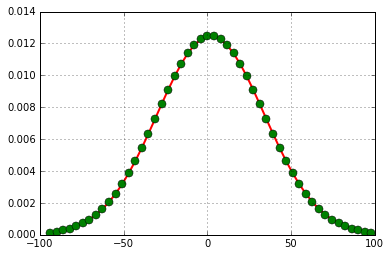

In [46]:
# 5.1 绘制正态分布概率密度函数
mu = 2
sigma = 32
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 50)
y = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)
# plot.plot(x, y, 'ro-', linewidth=2)
plot.plot(x, y, 'r-', x, y, 'go', linewidth=2, markersize=8)
plot.grid(True)
plot.show()

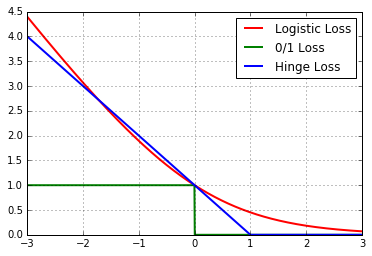

In [47]:
# # 5.2 损失函数：Logistic损失(-1,1)/SVM Hinge损失/ 0/1损失
x = np.linspace(-3, 3, 1000)
y_logit = np.log(1 + np.exp(-x)) / math.log(2)
y_01 = x < 0
y_hinge = 1 - x
y_hinge[y_hinge < 0] = 0
plot.plot(x, y_logit, 'r-', label='Logistic Loss', linewidth=2)
plot.plot(x, y_01, 'g-', label='0/1 Loss', linewidth=2)
plot.plot(x, y_hinge, 'b-', label='Hinge Loss', linewidth=2)
plot.grid()
plot.legend(loc='upper right')
plot.show()

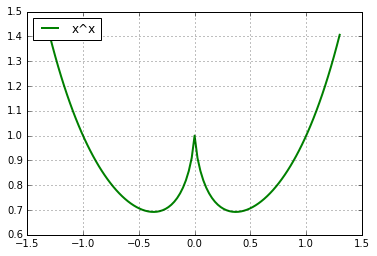

In [49]:
# # 5.3 x^x
def f(x):
    y = np.ones_like(x)
    i = x > 0
    y[i] = np.power(x[i], x[i])
    i = x < 0
    y[i] = np.power(-x[i], -x[i])
    return y

x = np.linspace(-1.3, 1.3, 101)
y = f(x)
plot.plot(x, y, 'g-', label='x^x', linewidth=2)
plot.grid()
plot.legend(loc='upper left')
plot.show()

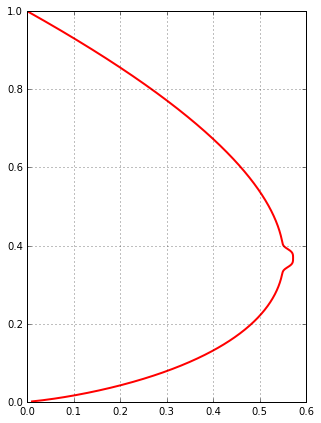

In [50]:
# # 5.4 胸型线
x = np.arange(1, 0, -0.001)
y = (-3 * x * np.log(x) + np.exp(-(40 * (x - 1 / np.e)) ** 4) / 25) / 2
plot.figure(figsize=(5,7))
plot.plot(y, x, 'r-', linewidth=2)
plot.grid(True)
plot.show()

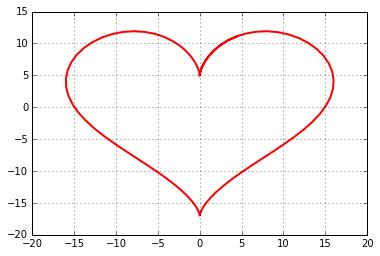

In [51]:
# # 5.5 心形线
t = np.linspace(0, 7, 100)
x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
plot.plot(x, y, 'r-', linewidth=2)
plot.grid(True)
plot.show()

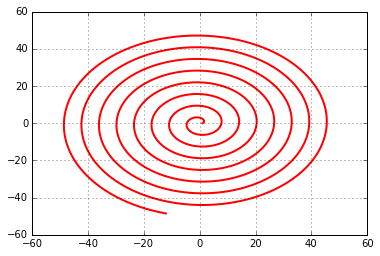

In [52]:
# # 5.6 渐开线
t = np.linspace(0, 50, num=1000)
x = t*np.sin(t) + np.cos(t)
y = np.sin(t) - t*np.cos(t)
plot.plot(x, y, 'r-', linewidth=2)
plot.grid()
plot.show()

## 概率分布

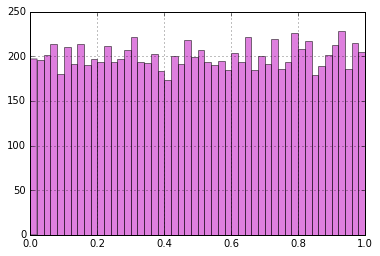

In [53]:
# # 6.1 均匀分布
x = np.random.rand(10000)
plot.hist(x, 50, color='m', alpha=0.5)
plot.grid()
plot.show()

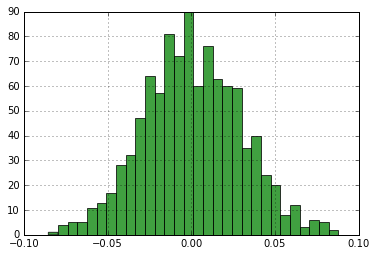

In [54]:
# # 6.2 验证中心极限定理
t = 10000
a = np.zeros(1000)
for i in range(t):
    a += np.random.uniform(-5, 5, 1000)
a /= t
plot.hist(a, bins=30, color='g', alpha=0.75)
plot.grid()
plot.show()

[6 5 3 ..., 5 7 8]


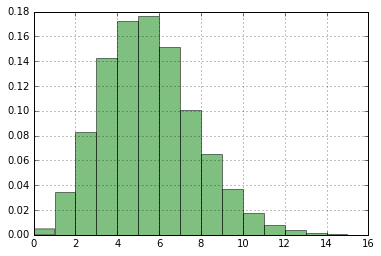

(array([ 0.0048,  0.0349,  0.0833,  0.1428,  0.1721,  0.1765,  0.1517,
        0.1005,  0.0651,  0.037 ,  0.0174,  0.0078,  0.0041,  0.0013,
        0.0007]), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.]), <a list of 15 Patch objects>)
1.0


In [4]:
# # 6.3 Poisson分布
x = np.random.poisson(lam=5, size=10000)
print x
pillar = 15
a = plot.hist(x, bins=pillar, normed=True, range=[0, pillar], color='g', alpha=0.5)
plot.grid()
plot.show()
print a
print a[0].sum()

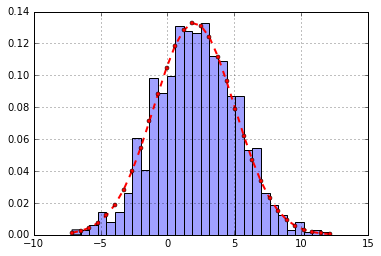

In [56]:
# # 6.4 直方图的使用
mu = 2
sigma = 3
data = mu + sigma * np.random.randn(1000)
h = plot.hist(data, 30, normed=1, color='#a0a0ff')
x = h[1]
y = norm.pdf(x, loc=mu, scale=sigma)
plot.plot(x, y, 'r--', x, y, 'ro', linewidth=2, markersize=4)
plot.grid()
plot.show()

### 插值

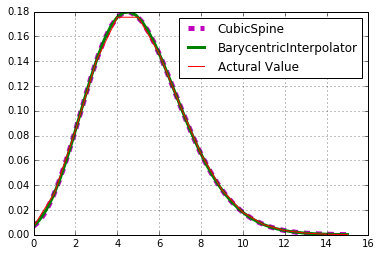

In [5]:
rv = poisson(5)
x1 = a[1]
y1 = rv.pmf(x1)
itp = BarycentricInterpolator(x1, y1)  # 重心插值
x2 = np.linspace(x.min(), x.max(), 50)
y2 = itp(x2)
cs = scipy.interpolate.CubicSpline(x1, y1)       # 三次样条插值
plot.plot(x2, cs(x2), 'm--', linewidth=5, label='CubicSpine')           # 三次样条插值
plot.plot(x2, y2, 'g-', linewidth=3, label='BarycentricInterpolator')   # 重心插值
plot.plot(x1, y1, 'r-', linewidth=1, label='Actural Value')             # 原始值
plot.legend(loc='upper right')
plot.grid()
plot.show()

## 绘制三维图像

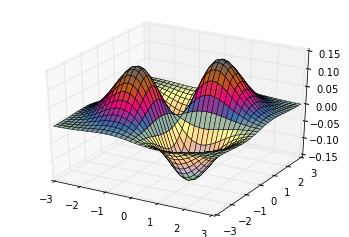

In [58]:
x, y = np.ogrid[-3:3:100j, -3:3:100j]
# u = np.linspace(-3, 3, 101)
# x, y = np.meshgrid(u, u)
z = x*y*np.exp(-(x**2 + y**2)/2) / math.sqrt(2*math.pi)
# z = x*y*np.exp(-(x**2 + y**2)/2) / math.sqrt(2*math.pi)
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.coolwarm, linewidth=0.1)  #
ax.plot_surface(x, y, z, rstride=3, cstride=3, cmap=cm.Accent, linewidth=0.5)
plot.show()
# cmaps = [('Perceptually Uniform Sequential',
#           ['viridis', 'inferno', 'plasma', 'magma']),
#          ('Sequential', ['Blues', 'BuGn', 'BuPu',
#                          'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
#                          'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
#                          'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
#          ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
#                              'copper', 'gist_heat', 'gray', 'hot',
#                              'pink', 'spring', 'summer', 'winter']),
#          ('Diverging', ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
#                         'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
#                         'seismic']),
#          ('Qualitative', ['Accent', 'Dark2', 'Paired', 'Pastel1',
#                           'Pastel2', 'Set1', 'Set2', 'Set3']),
#          ('Miscellaneous', ['gist_earth', 'terrain', 'ocean', 'gist_stern',
#                             'brg', 'CMRmap', 'cubehelix',
#                             'gnuplot', 'gnuplot2', 'gist_ncar',
#                             'nipy_spectral', 'jet', 'rainbow',
#                             'gist_rainbow', 'hsv', 'flag', 'prism'])]

## scipy

### 线性回归

真实值： 2 3 -1
预测值： [ 2.01995713  3.0046843  -0.57834205]


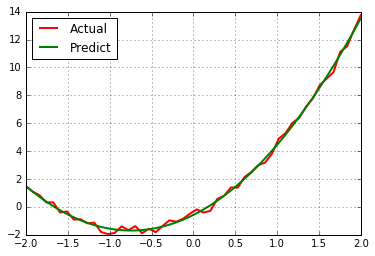

In [60]:
x = np.linspace(-2, 2, 50)
A, B, C = 2, 3, -1
y = (A * x ** 2 + B * x + C) + np.random.rand(len(x))*0.75

t = leastsq(residual, [0, 0, 0], args=(x, y))
theta = t[0]
print '真实值：', A, B, C
print '预测值：', theta
y_hat = theta[0] * x ** 2 + theta[1] * x + theta[2]
plot.plot(x, y, 'r-', linewidth=2, label='Actual')
plot.plot(x, y_hat, 'g-', linewidth=2, label='Predict')
plot.legend(loc='upper left')
plot.grid()
plot.show()

3 1
3.0 1.0
3.0 1.0
3.0000000447 1.0
3.0 1.0000000149
0.677230882571 1.41050638551
0.677230892663 1.41050638551
0.677230882571 1.41050640653
4.86657141324 2.06079562022
3.19749563813 1.48864235722
3.19749568578 1.48864235722
3.19749563813 1.4886423794
5.01097846454 1.50851455644
5.01097853921 1.50851455644
5.01097846454 1.50851457892
5.01304422332 1.50138425177
5.01304429802 1.50138425177
5.01304422332 1.50138427414
5.01405780892 1.5013902014
5.01405788364 1.5013902014
5.01405780892 1.50139022377
5.01405779342 1.50139021127
真实值： 5 1.5
预测值： [ 5.01405779  1.50139021]


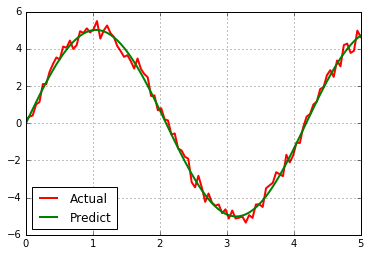

In [61]:
# # 线性回归例2
x = np.linspace(0, 5, 100)
A = 5
w = 1.5
y = A * np.sin(w*x) + np.random.rand(len(x)) - 0.5

t = leastsq(residual2, [3, 1], args=(x, y))
theta = t[0]
print '真实值：', A, w
print '预测值：', theta
y_hat = theta[0] * np.sin(theta[1] * x)
plot.plot(x, y, 'r-', linewidth=2, label='Actual')
plot.plot(x, y_hat, 'g-', linewidth=2, label='Predict')
plot.legend(loc='lower left')
plot.grid()
plot.show()

### 使用scipy计算函数极值

BFGS 算法用到[牛顿法](http://blog.csdn.net/itplus/article/details/21897443)。牛顿法实现思想：
1. 将求极小函数展开到二阶
2. 用展开后函数求解极小值位置
3. 反复迭代

这里涉及的核心计算包括
* 一阶导
* 二阶导

[BFGS 算法](http://blog.csdn.net/itplus/article/details/21897443)的核心是对二阶导的改进，用 $B_{k+1} (x_{k+1}- x_k)=\nabla f(x_{k+1}) - \nabla f(x_{k})$，找到两次迭代之间 $B_{k+1} = B_{k} + \delta B_{k+1}$ 与位置和一阶导数的近似关系，从而得到二阶导矩阵 Hession 矩阵。出修正项为 Rank 2 的项 $\delta B_{k+1} = \alpha u u^T + \beta v v^T$，再按 $B_{k+1}s_k=B_{k}s_k + \alpha u u^T s_k + \beta v v^T s_k = y_k$

[DFP 算法](http://blog.csdn.net/itplus/article/details/21896981) 与 BFGS 的差别在， BFGS 是近似 Hession 矩阵，而 DFP 算法则近似 Hession 矩阵的逆

[L-BFGS 算法](http://blog.csdn.net/itplus/article/details/21897715) 与 DFP 的差别在，不存储 DFP 中 Hession 矩阵的逆，而是存储每次生成矩阵所用的矢量（最新 m 个），计算乘法时，通过这些矢量做计算。最后得到相应的结果。

In [62]:
a = opt.fmin(f, 1)
b = opt.fmin_cg(f, 1)
c = opt.fmin_bfgs(f, 1)
print a, 1/a, np.e
print b
print c

Optimization terminated successfully.
         Current function value: 0.692201
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.692201
         Iterations: 4
         Function evaluations: 30
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.692201
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8
[ 0.36787109] [ 2.71834351] 2.71828182846
[ 0.36787948]
[ 0.36787942]


# 作业 

## 画图


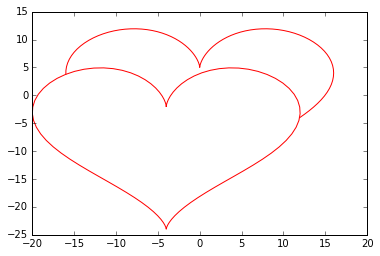

In [102]:
def heart(t):
    x = 16 * np.sin(t) ** 3
    y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
    return x, y

def fHeart(tArray, Arrow):
    x, y = heart(tArray[0])
    x1, y1 = heart(tArray[1])
    x1 -= Arrow[0]
    y1 -= Arrow[1]
    return [x-x1, y-y1]

from scipy.optimize import fsolve

Arrow = np.array([4,7])

inputT1Array = [2*np.pi*0.25,2*np.pi*0.2]
inputT2Array = [2*np.pi*0.75,2*np.pi*0.8]
T1Array = fsolve(fHeart, inputT1Array, Arrow)
T2Array = fsolve(fHeart, inputT2Array, Arrow)

t = np.linspace(-2*np.pi+ T2Array[0], T1Array[0], 100)
x, y = heart(t)

t1 = np.linspace(0,2*np.pi, 100)
x1,y1 = heart(t1)
xC, yC = heart([)
plt.plot(x,y, 'r-')
plt.plot(x1-4,y1-7, 'r-')
plt.plot([0,Arrow[0]], [0,Arrow[1]], 'r-')


## SVD恢复图片


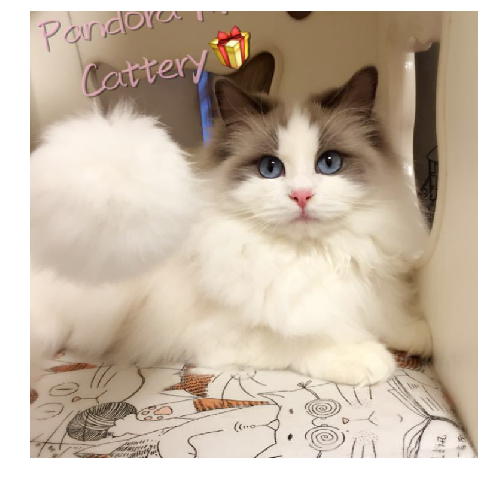

In [9]:
from PIL import Image
img = np.array(Image.open('appendix/cat.jpg'))
plt.figure('cat')
plt.imshow(img)
plt.axis('off')
plt.show()

In [74]:
from scipy.linalg import svd
U, S, V = [0,0,0], [0,0,0], [0,0,0]
for i in range(3):
    u, s, v = svd(img[:,:,i])
    U[i] = u
    S[i] = s
    V[i] = v

def getImgDeep(U,S,V,deep):
    nX = U[0].shape[0]
    nY = V[0].shape[0]
    image = np.zeros([nX, nY, 3])
    for i in range(3):
        image[:,:,i] = np.dot(np.dot(U[i][:,:deep], np.diag(S[i][:deep])), V[i][:deep,:])
        image[image > 255] = 255
        image[image < 0] = 0
        image = image.astype('uint8')
    return image

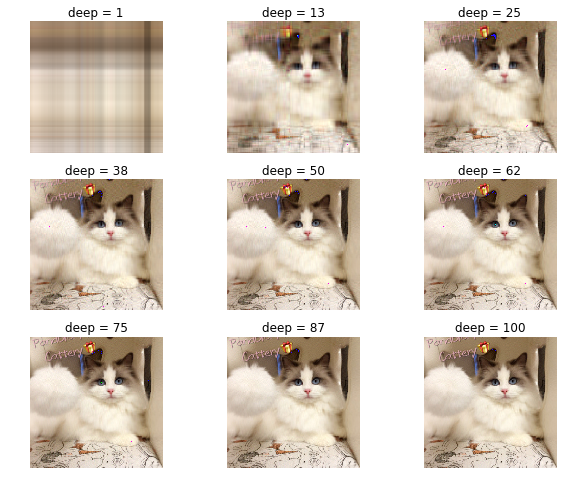

In [79]:
nD = 9
deepArray = np.linspace(1,100,nD).astype('int')
plt.figure()
for i in range(nD):
    plt.subplot(3,3,i+1)
    plt.title('deep = ' + str(deepArray[i]))
    image = getImgDeep(U,S,V,deepArray[i])
    plt.imshow(image)
    plt.axis('off')

plt.show()